### Dont edit this



In [1]:
import requests
import matplotlib.pylab as plt

# Helper
def name_to_b58(hotspot_name):
    return list(filter(lambda x: '-'.join(x['name'].lower().split(' ')) == hotspot_name,
                       HOTSPOTS))[0]['address']

def b58_to_name(hb58):
    return list(filter(lambda x: x['address'] == hb58, HOTSPOTS))[0]['name']

def get_witnesses_by_name(hname):
    hotspot = name_to_b58(hname)

    witness_resp = requests.get('{}/witnesses/{}'.format(API, hotspot))
    assert(witness_resp.status_code == 200)

    witnesses = witness_resp.json()['data']
    return witnesses

def get_witnesses(hb58):
    witness_resp = requests.get('{}/witnesses/{}'.format(API, hb58))
    assert(witness_resp.status_code == 200)

    witnesses = witness_resp.json()['data']
    return witnesses

def get_path(challenge_id):
    challenge_resp = requests.get('{}/challenges/{}'.format(API, challenge_id))
    assert(challenge_resp.status_code == 200)
    
    path = challenge_resp.json()['data']['pathElements']
    addresses = [p['address'] for p in path]
    return addresses

def plot_single_witness_by_name(hname, wname):
    witnesses = get_witnesses_by_name(hname)
    for witness in witnesses:
        if '-'.join(witness['name'].lower().split(' ')) == wname:
            hist = witness['hist']
            address = witness['address']
            w_name = witness['name']
            print("{} has witnessed {} at these RSSI values".format(wname, hname))
            # print(w_name)
            # print(hist)
            plt.bar(range(len(hist)), list(hist.values()), align='center')
            plt.xticks(range(len(hist)), list(hist.keys()))
            plt.title('Histogram')
            plt.xlabel('Buckets')
            plt.ylabel('Counts')
            plt.show()
    return

def plot_single_witness(hb58, wb58):
    witnesses = get_witnesses(hb58)
    for witness in witnesses:
        if witness['address'] == wb58:
            hist = witness['hist']
            address = witness['address']
            w_name = witness['name']
            print("{} has witnessed {} at these RSSI values".format(w_name, b58_to_name(hb58)))
            # print(w_name)
            print(hist)
            plt.bar(range(len(hist)), list(hist.values()), align='center')
            plt.xticks(range(len(hist)), list(hist.keys()))
            plt.title('Histogram')
            plt.xlabel('Buckets')
            plt.ylabel('Counts')
            plt.show()
    return

# Constants, don't touch this
API = 'https://explorer.helium.foundation/api'
hotspots_resp = requests.get("{}/hotspots".format(API))
assert(hotspots_resp.status_code == 200)
HOTSPOTS = hotspots_resp.json()['data']

### Edit challenge_id to get path RSSI histograms

In [2]:
challenge_id = 1157989

In [3]:
path_b58_addrs = get_path(challenge_id)

In [4]:
path_b58_addrs

['1128s66jgeG9oxw33FV7Gw52wfNukPSKGupB2C7N3w1poid5LeRC',
 '11iYaU281c2Yjo2tvMxyeu1t95Cv7aLWuAoBYte51gZ7bKijzpj',
 '11Cf71gfoUWGKg64i3JaiZLeroUFzBenfMzJiXCuq7wRp12G7tm',
 '112tH63a6WUWTdX1d99szjyj31JbGfasG6mrBfwCUX3gdTXMHWdR',
 '112L7A2Xpkh7fjKjuaTfq3WgEn9nnAXg2M7BTWsR9dYvn4eopguz',
 '11Y8kn3fygywYkSFNkLNYqRFh22jkzFLYuVPAPcAwg7FeR5dnea',
 '11DvZivbwHVRx4PbQwAd5w2DQEAcfSCRVzsW7gjRKQ86nCEJxHJ']

In [5]:
path_names = [b58_to_name(i) for i in path_b58_addrs]
path_names

['Electric Chiffon Porcupine',
 'Boxy Wool Bull',
 'Shaggy Quartz Rook',
 'High Citron Raccoon',
 'Stable Pear Pangolin',
 'Daring Citron Newt',
 'Hidden Tangelo Starling']

In [6]:
def plot_path_rssi_hist(path):
  path_length = len(path)
  i = 0
  while i < path_length:
      if i == path_length - 1:
          print('done')
      else:
          h = path[i]
          w = path[i + 1]
          plot_single_witness(h, w)
      i += 1
  return

Boxy Wool Bull has witnessed Electric Chiffon Porcupine at these RSSI values
{'-132': 0, '-123': 0, '-114': 0, '-105': 9, '-97': 2, '-88': 7, '-79': 64, '-70': 10, '-62': 0, '-53': 0, '28': 3}


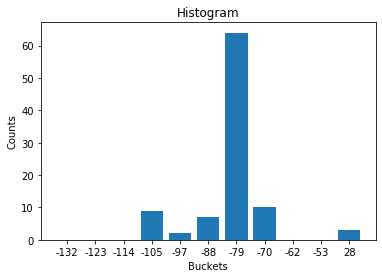

Shaggy Quartz Rook has witnessed Boxy Wool Bull at these RSSI values
{'-132': 0, '-123': 8, '-115': 7, '-107': 20, '-99': 51, '-90': 0, '-82': 0, '-74': 0, '-66': 0, '-58': 0, '28': 0}


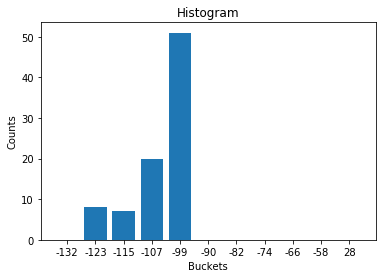

High Citron Raccoon has witnessed Shaggy Quartz Rook at these RSSI values
{'-132': 0, '-123': 1, '-114': 13, '-106': 47, '-97': 17, '-89': 0, '-80': 0, '-72': 0, '-63': 0, '-55': 0, '28': 1}


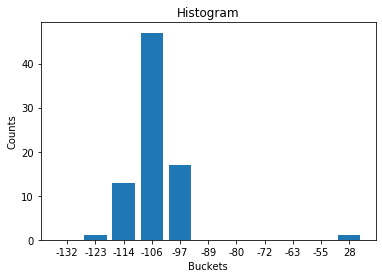

Stable Pear Pangolin has witnessed High Citron Raccoon at these RSSI values
{'-132': 0, '-122': 20, '-113': 41, '-104': 17, '-95': 0, '-86': 0, '-77': 0, '-68': 0, '-59': 0, '-50': 0, '28': 1}


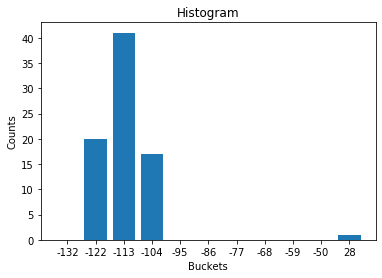

Daring Citron Newt has witnessed Stable Pear Pangolin at these RSSI values
{'-132': 0, '-123': 0, '-114': 4, '-106': 39, '-97': 41, '-89': 0, '-80': 0, '-72': 0, '-63': 0, '-55': 0, '28': 1}


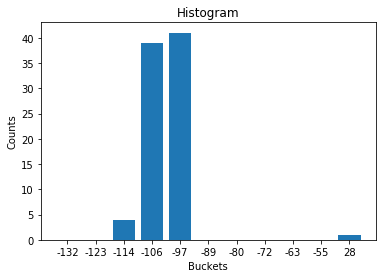

Hidden Tangelo Starling has witnessed Daring Citron Newt at these RSSI values
{'-132': 0, '-122': 2, '-113': 11, '-104': 69, '-95': 4, '-86': 0, '-77': 0, '-67': 0, '-58': 0, '-49': 0, '28': 2}


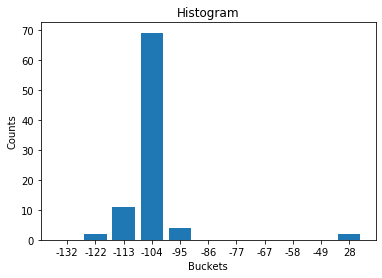

done


In [7]:
plot_path_rssi_hist(path_b58_addrs)

### Edit hotspot_name and witness_name to get RSSI hist

In [8]:
# For example
hotspot_name = "skinny-fleece-mockingbird"
witness_name = "skinny-blue-rat"

skinny-blue-rat has witnessed skinny-fleece-mockingbird at these RSSI values


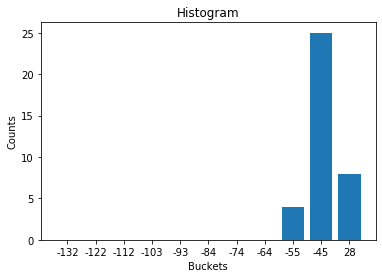

In [9]:
plot_single_witness_by_name(hotspot_name, witness_name)

### For getting ALL witness RSSIs

In [10]:
path_names

['Electric Chiffon Porcupine',
 'Boxy Wool Bull',
 'Shaggy Quartz Rook',
 'High Citron Raccoon',
 'Stable Pear Pangolin',
 'Daring Citron Newt',
 'Hidden Tangelo Starling']

{'-132': 0, '-124': 0, '-116': 0, '-108': 1, '-100': 108, '-92': 82, '-84': 0, '-76': 0, '-68': 0, '-60': 6, '28': 55}


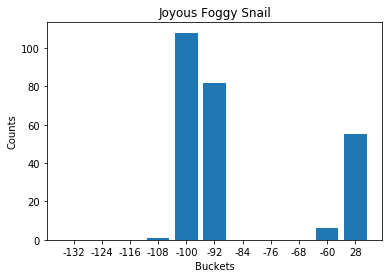

{'-132': 0, '-124': 9, '-116': 140, '-109': 53, '-101': 0, '-93': 0, '-86': 0, '-78': 0, '-70': 0, '-63': 0, '28': 0}


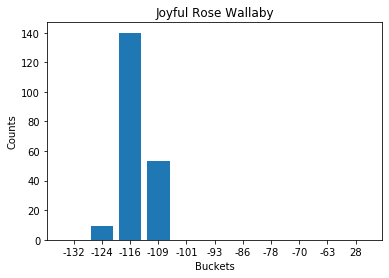

{'-132': 0, '-124': 0, '-116': 0, '-108': 0, '-100': 128, '-92': 70, '-84': 1, '-76': 0, '-68': 0, '-60': 0, '28': 6}


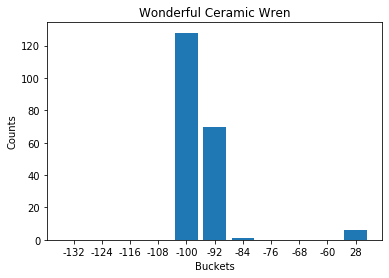

{'-132': 0, '-124': 4, '-116': 89, '-108': 49, '-100': 1, '-92': 1, '-84': 0, '-76': 0, '-68': 0, '-60': 0, '28': 4}


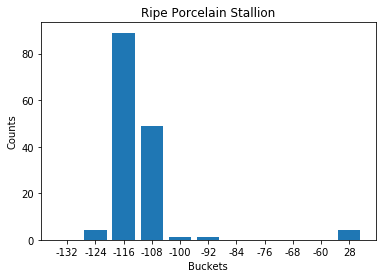

{'-132': 0, '-124': 0, '-116': 92, '-108': 128, '-100': 2, '-92': 0, '-84': 0, '-76': 0, '-68': 3, '-61': 0, '28': 56}


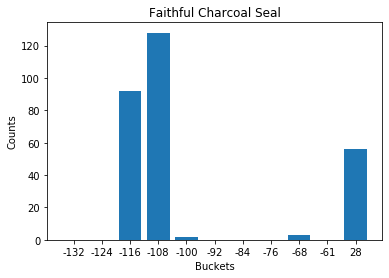

{'-132': 0, '-124': 0, '-116': 136, '-108': 55, '-100': 0, '-93': 0, '-85': 0, '-77': 0, '-69': 0, '-62': 0, '28': 52}


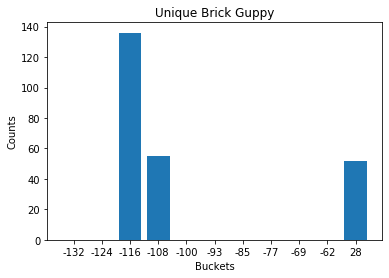

{'-132': 0, '-124': 0, '-116': 8, '-109': 151, '-101': 1, '-93': 0, '-86': 0, '-78': 0, '-70': 0, '-63': 0, '28': 2}


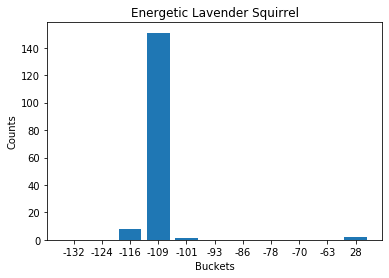

In [11]:
## Comment out to see all the values

hotspot_name = "bubbly-pastel-ant"
witnesses = get_witnesses_by_name(hotspot_name)

for w in witnesses:
    hist = w['hist']
    address = w['address']
    name = w['name']
    print(hist)
    plt.bar(range(len(hist)), list(hist.values()), align='center')
    plt.xticks(range(len(hist)), list(hist.keys()))
    plt.title(name)
    plt.xlabel('Buckets')
    plt.ylabel('Counts')
    plt.show()

In [12]:
x = {'-132': 0, '-124': 0, '-116': 0, '-109': 38, '-101': 0, '-93': 0, '-86': 0, '-78': 0, '-70': 0, '-63': 0, '28': 2}
sum(x.values())

40

### Edit block height to inspect txns

In [13]:
BLOCK_HEIGHT = 165691

In [14]:
transactions_resp = requests.get("{}/blocks/{}/transactions".format(API, BLOCK_HEIGHT))
assert(transactions_resp.status_code == 200)

In [15]:
def txn_breakdown(txn_resp):
    txns = txn_resp.json()['data']
    poc_receipt_txns = [t for t in txns if t['type'] == 'poc_receipts']
    poc_req_txns = [t for t in txns if t['type'] == 'poc_request']
    other_txns = [t for t in txns if t['type'] not in ['poc_receipts', 'poc_request']]

    print("block_height: {}, total_txns: {}".format(BLOCK_HEIGHT, len(txns)))
    print("block_height: {}, total_poc_receipts: {}".format(BLOCK_HEIGHT, len(poc_receipt_txns)))
    print("block_height: {}, total_poc_requests: {}".format(BLOCK_HEIGHT, len(poc_req_txns)))
    print("block_height: {}, other_txns: {}".format(BLOCK_HEIGHT, len(other_txns)))

In [16]:
txn_breakdown(transactions_resp)

block_height: 165691, total_txns: 101
block_height: 165691, total_poc_receipts: 45
block_height: 165691, total_poc_requests: 56
block_height: 165691, other_txns: 0


In [17]:
data = {'w1': {'tot': 141, 'good': 87, 'bad': 54},
 'w2': {'tot': 77, 'good': 77, 'bad': 0},
 'w3': {'tot': 78, 'good': 74, 'bad': 4},
 'w4': {'tot': 42, 'good': 39, 'bad': 3},
 'w5': {'tot': 143, 'good': 92, 'bad': 51},
 'w6': {'tot': 124, 'good': 73, 'bad': 51},
 'w7': {'tot': 40, 'good': 38, 'bad': 2}
}

In [18]:
data

{'w1': {'tot': 141, 'good': 87, 'bad': 54},
 'w2': {'tot': 77, 'good': 77, 'bad': 0},
 'w3': {'tot': 78, 'good': 74, 'bad': 4},
 'w4': {'tot': 42, 'good': 39, 'bad': 3},
 'w5': {'tot': 143, 'good': 92, 'bad': 51},
 'w6': {'tot': 124, 'good': 73, 'bad': 51},
 'w7': {'tot': 40, 'good': 38, 'bad': 2}}

In [19]:
tot = [141, 77, 78, 42, 143, 124, 40]

In [20]:
[1 - i/sum(tot) for i in tot]

[0.7813953488372093,
 0.8806201550387597,
 0.8790697674418605,
 0.9348837209302325,
 0.7782945736434108,
 0.8077519379844962,
 0.937984496124031]